# CLUSTERING ALGORITHM
## 1. Dimentional Reduction with PCA (Principal Component Analysis)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [2]:
# prepare the data
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

#Constract a dataFrame
my_iris_DataFrame = pd.DataFrame(X, columns=iris_data.feature_names)
my_iris_DataFrame['Label']=y
my_iris_DataFrame['Species'] = my_iris_DataFrame['Label'].map({0:'Setosa', 1:'Versicolor', 2:'Virginica'})
my_iris_DataFrame=my_iris_DataFrame.drop(['Label'], axis=1)
my_iris_DataFrame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
my_iris_DataFrame.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [4]:
# discribe data
my_iris_DataFrame.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


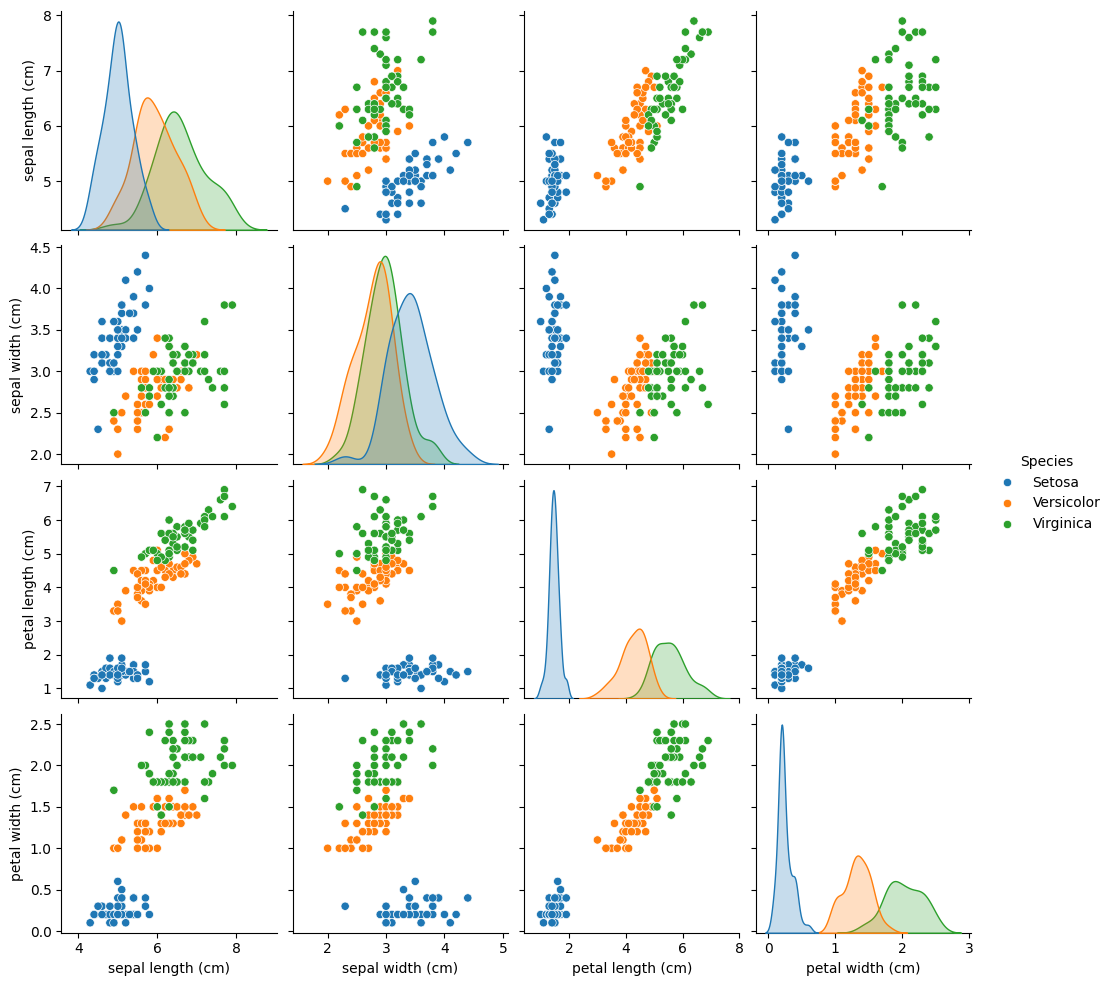

In [5]:
sns.pairplot(my_iris_DataFrame, hue="Species")

In [6]:
# Now I can import a model PCA
my_model = PCA()
# Project original featurers into the Principle Components
x_pca = my_model.fit_transform(X)
# Create the pca Data Frame where you will store variances each Principle Component captures from the original data
my_pca_DataFrame = pd.DataFrame(x_pca, columns=('PC1','PC2','PC3','PC4'))
#merge the two DataFrames 
merged_DataFrame = pd.merge(my_iris_DataFrame, my_pca_DataFrame, left_index=True, right_index=True)
print(merged_DataFrame)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       Species       PC1   

In [7]:
# Evaluate how much variance each PC capture from the original data
for index in range(4):
    print('PC{}:{}'.format(index + 1, my_model.explained_variance_ratio_[index]))

PC1:0.9246187232017341
PC2:0.05306648311706383
PC3:0.017102609807927525
PC4:0.00521218387327465


Text(0.5, 1.0, 'Data Visualized in One Dimension')

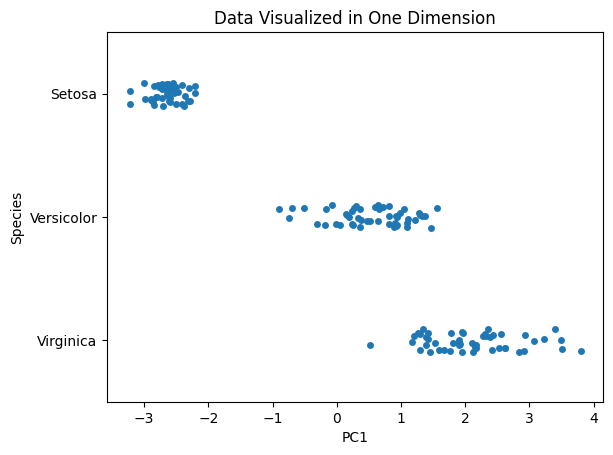

In [8]:
# Plot data using One Dimension
sns.stripplot(x='PC1', y='Species', data=merged_DataFrame, jitter=True)
plt.title('Data Visualized in One Dimension')

Text(0.5, 1.0, 'Data visualised with two Dimensions')

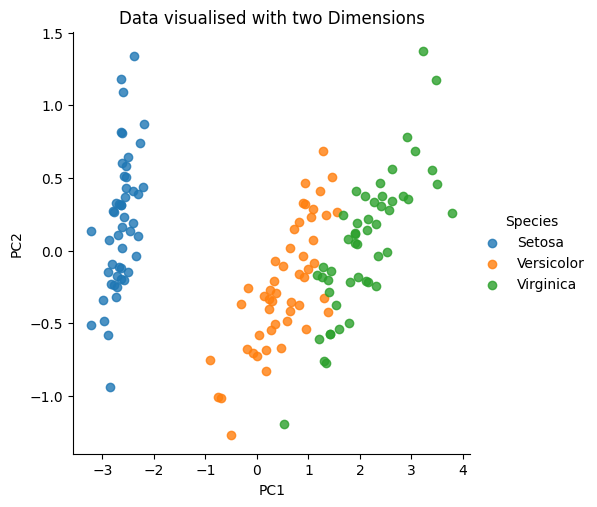

In [13]:
# Try with two dimentions
sns.lmplot(x='PC1', y='PC2', data=merged_DataFrame,  fit_reg=False, hue='Species')
plt.title('Data visualised with two Dimensions')

In [10]:
my_model.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

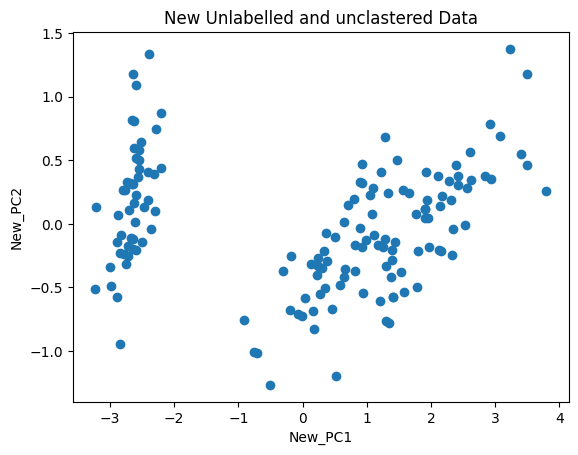

In [11]:
# Extract two new components from the transformed data
new_pca = x_pca[:,:2]
plt.scatter(new_pca[:,0], new_pca[:,1])
plt.xlabel("New_PC1")
plt.ylabel("New_PC2")
plt.title("New Unlabelled and unclastered Data")
plt.show()